# Import libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import mllib

# Import data

In [6]:
trainingData = pd.read_csv('csv/trainingData.csv')

In [7]:
validationData = pd.read_csv('csv/validationData.csv')

In [8]:
accuracy_df = pd.read_csv('csv/visualization/accuracy_df.csv')

In [9]:
regression_models = pd.read_csv('csv/visualization/regression_models.csv')

In [10]:
positions_df_actual_test = pd.read_csv('csv/visualization/positions_df_actual_test.csv',index_col=0)

In [11]:
positions_df_pred_test = pd.read_csv('csv/visualization/positions_df_pred_test.csv',index_col=0)

In [12]:
positions_df_actual_val = pd.read_csv('csv/visualization/positions_df_actual_val.csv',index_col=0)

In [13]:
positions_df_pred_val = pd.read_csv('csv/visualization/positions_df_pred_val.csv',index_col=0)

In [14]:
positions_df_actual_train = pd.read_csv('csv/visualization/positions_df_actual_train.csv',index_col=0)

In [15]:
positions_df_pred_train = pd.read_csv('csv/visualization/positions_df_pred_train.csv',index_col=0)

In [16]:
X_train = pd.read_csv('csv/transformed/X_train.csv',index_col=0)

In [17]:
X_test = pd.read_csv('csv/transformed/X_test.csv',index_col=0)

In [18]:
X_val = pd.read_csv('csv/transformed/X_val.csv',index_col=0)

# Visualization: building, floor

## Accuracy of models

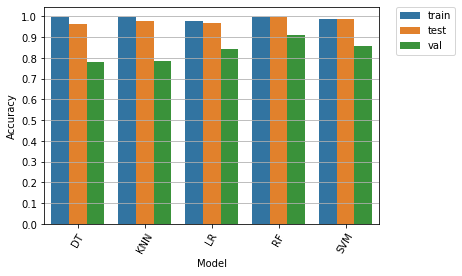

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.barplot(data = accuracy_df, x = "model", y = "accuracy", 
            hue = "set")
#plt.title('BUILDING: '+ str(building) +' TARGET: '+ target)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation = 60)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(axis='y')
plt.show()

# Visualization: lat, long

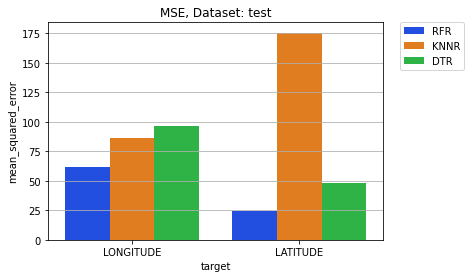

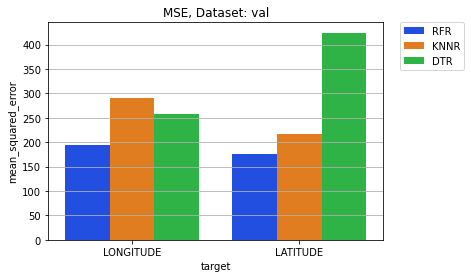

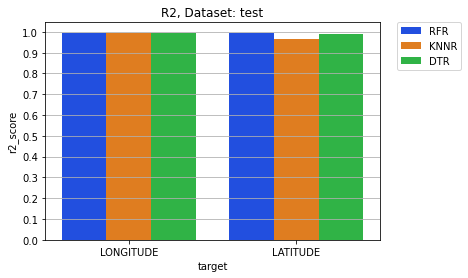

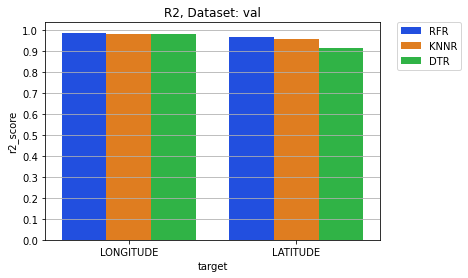

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for ds in regression_models.dataset.unique():
    
    data = regression_models.query('dataset == @ds')
    # plot MSE
    plt.title('MSE, Dataset: '+ds)
    plt.grid(axis='y')
    sns.barplot(data = data, x = "target", y = "mean_squared_error", 
                hue = "model", palette = "bright")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
for ds in regression_models.dataset.unique():   
    data = regression_models.query('dataset == @ds')
    # plot R2
    plt.title('R2, Dataset: '+ds)
    plt.grid(axis='y')
    plt.yticks(np.arange(0, 1.01, step=0.1))
    sns.barplot(data = data, x = "target", y = "r2_score", 
                hue = "model", palette = "bright")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

## Predicted vs actual position

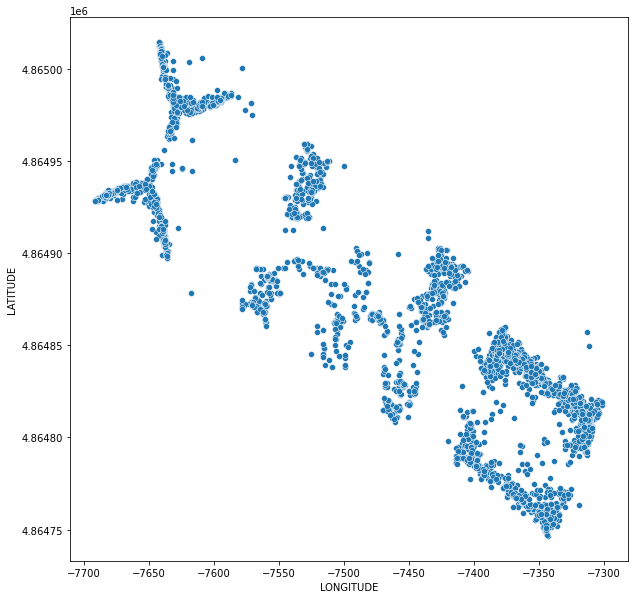

In [57]:
# show all positions of the buildings TEST
plt.figure(figsize = (10,10))
plt.xlabel("LONGITUDE")
#sns.scatterplot(data = positions_df_actual_test, x = 'LONGITUDE', y = 'LATITUDE')
sns.scatterplot(data = positions_df_pred_test, x = 'LONGITUDE', y = 'LATITUDE')
plt.show()

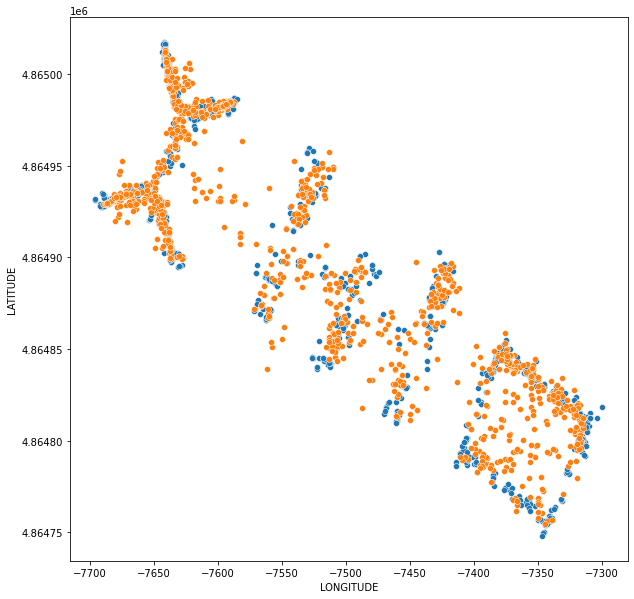

In [22]:
# show all positions of the buildings VALIDATION

plt.figure(figsize = (10,10))
plt.xlabel("LONGITUDE")
sns.scatterplot(data = positions_df_actual_val, x = 'LONGITUDE', y = 'LATITUDE')
sns.scatterplot(data = positions_df_pred_val, x = 'LONGITUDE', y = 'LATITUDE')
plt.show()

## Error distribution

### Train dataset

Mean: -0.02892125616929575   Std: 6.064240785568173


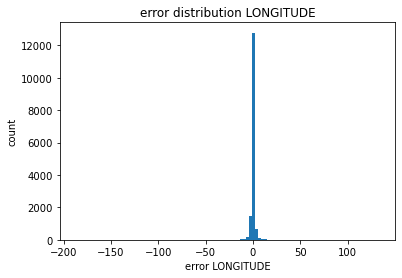

Mean: -0.02262544992854565   Std: 4.25010818535312


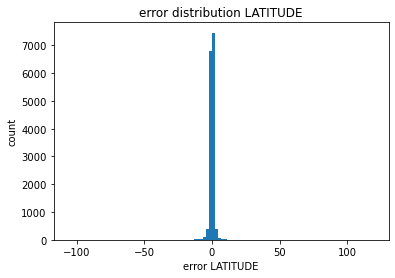

In [23]:
# TEST
diff_long_train = positions_df_actual_train['LONGITUDE'] - positions_df_pred_train['LONGITUDE']
diff_long_train.index = positions_df_actual_train.index
y = diff_long_train
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LONGITUDE')
plt.ylabel("count")
plt.title('error distribution LONGITUDE')
plt.hist(y, bins = 100)
plt.show()

diff_lat_train = positions_df_actual_train['LATITUDE'] - positions_df_pred_train['LATITUDE']
diff_lat_train.index = positions_df_actual_train.index
y = diff_lat_train
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LATITUDE')
plt.ylabel("count")
plt.title('error distribution LATITUDE')
plt.hist(y, bins = 100)
plt.show()

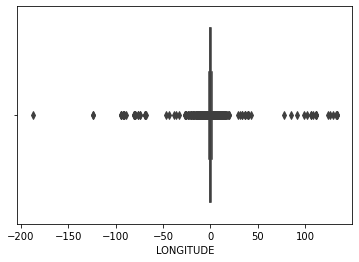

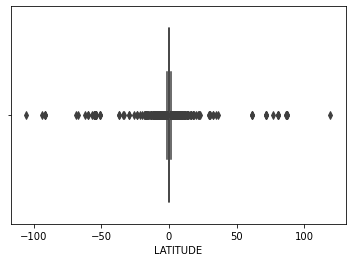

In [24]:
sns.boxplot(x=diff_long_train)
plt.show()
sns.boxplot(x=diff_lat_train)
plt.show()

### Test dataset

Mean: 0.05572191275091455   Std: 7.8708761136825025


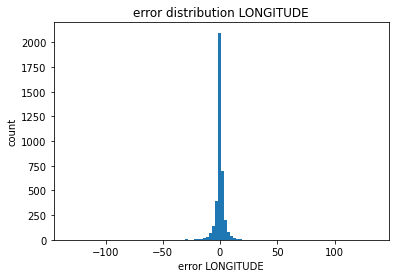

Mean: -0.07033000976722532   Std: 4.977394996725054


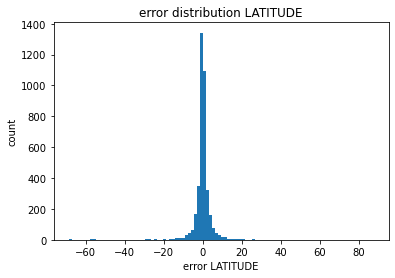

In [25]:
# TEST
diff_long_test = positions_df_actual_test['LONGITUDE'] - positions_df_pred_test['LONGITUDE']
diff_long_test.index = positions_df_actual_test.index
y = diff_long_test
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LONGITUDE')
plt.ylabel("count")
plt.title('error distribution LONGITUDE')
plt.hist(y, bins = 100)
plt.show()

diff_lat_test = positions_df_actual_test['LATITUDE'] - positions_df_pred_test['LATITUDE']
diff_lat_test.index = positions_df_actual_test.index
y = diff_lat_test
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LATITUDE')
plt.ylabel("count")
plt.title('error distribution LATITUDE')
plt.hist(y, bins = 100)
plt.show()

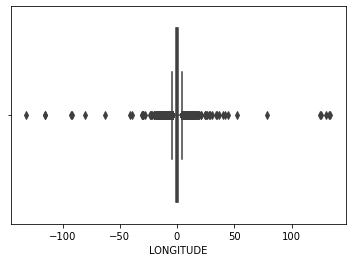

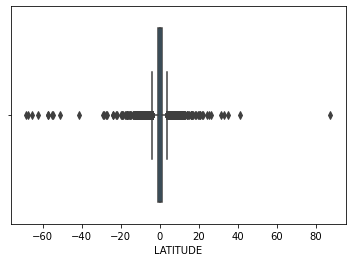

In [26]:
sns.boxplot(x=diff_long_test)
plt.show()
sns.boxplot(x=diff_lat_test)
plt.show()

### Validation dataset

Mean: -0.91609926854899   Std: 13.918007252560807


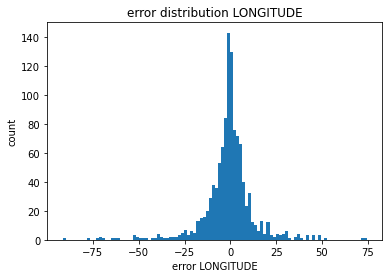

Mean: -0.1737371511978678   Std: 13.256442716732023


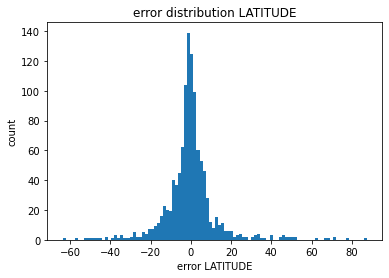

In [27]:
# VALIDATION
diff_long_val = positions_df_actual_val['LONGITUDE'] - positions_df_pred_val['LONGITUDE']
diff_long_val.index = positions_df_actual_val.index
y = diff_long_val
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LONGITUDE')
plt.ylabel("count")
plt.title('error distribution LONGITUDE')
plt.hist(y, bins = 100)
plt.show()

diff_lat_val = positions_df_actual_val['LATITUDE'] - positions_df_pred_val['LATITUDE']
diff_lat_val.index = positions_df_actual_val.index
y = diff_lat_val
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LATITUDE')
plt.ylabel("count")
plt.title('error distribution LATITUDE')
plt.hist(y, bins = 100)
plt.show()

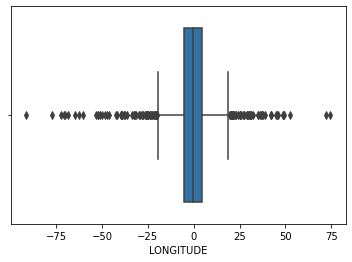

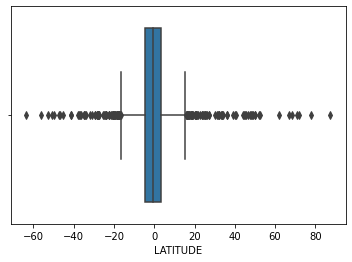

In [28]:
sns.boxplot(x=diff_long_val)
plt.show()
sns.boxplot(x=diff_lat_val)
plt.show()

## Outliers

In [31]:
def getOutlierLimits(data):
    '''
    return lower and higher limits for outliers
    '''
    Q3 = np.quantile(data, 0.75)
    Q1 = np.quantile(data, 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range,upper_range

### Train data

In [32]:
lim_train_lat1,lim_train_lat2 = getOutlierLimits(diff_lat_train)

In [33]:
lim_train_long1,lim_train_long2 = getOutlierLimits(diff_long_train)

In [34]:
diff_lat_train_df = pd.DataFrame(diff_lat_train)
index_outliers_lat_train  = diff_lat_train_df.query('(LATITUDE < @lim_train_lat1) or (LATITUDE>@lim_train_lat2)')
diff_long_train_df = pd.DataFrame(diff_long_train)
index_outliers_long_train  = diff_long_train_df.query('(LONGITUDE < @lim_train_long1) or (LONGITUDE>@lim_train_long2)')

In [35]:
# find indexes of ALL outliers
outliers_train_long_ind =  list(index_outliers_long_train.index) 
outliers_train_lat_ind = list(index_outliers_lat_train.index)
outliers_train_ind = list(set(outliers_train_long_ind + outliers_train_lat_ind))

(array([ 288.,    0.,  264.,    0.,   22.,    0.,   77.,    0.,  218.,
           0.,   95.,    0.,  319.,    0.,  191.,    0.,  121.,    0.,
         172.,    0., 1037.,    0.,   86.,    0.,   99.,    0.,  111.,
           0.,  185.,    0.,  122.,    0.,  224.,    0.,  142.]),
 array([ 1.        ,  1.48571429,  1.97142857,  2.45714286,  2.94285714,
         3.42857143,  3.91428571,  4.4       ,  4.88571429,  5.37142857,
         5.85714286,  6.34285714,  6.82857143,  7.31428571,  7.8       ,
         8.28571429,  8.77142857,  9.25714286,  9.74285714, 10.22857143,
        10.71428571, 11.2       , 11.68571429, 12.17142857, 12.65714286,
        13.14285714, 13.62857143, 14.11428571, 14.6       , 15.08571429,
        15.57142857, 16.05714286, 16.54285714, 17.02857143, 17.51428571,
        18.        ]),
 <BarContainer object of 35 artists>)

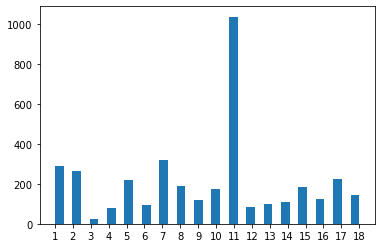

In [36]:
data = trainingData.loc[outliers_train_ind,:]
#plt.xticks(len(data.USERID.sort_values().unique()))
plt.xticks( np.arange(1, 19) )
plt.hist(data=data, x="USERID",bins=35)

In [37]:
# how many of total ouliers?
len(data[data.USERID == 11]) / len(data)

0.2748476013782136

(array([556.,   0., 167.,   0., 314.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

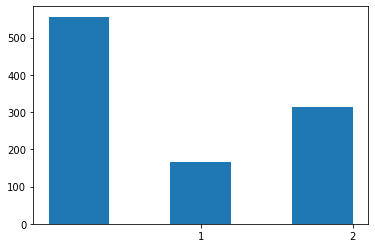

In [38]:
plt.xticks(np.arange(1, 26))
plt.hist(data[data.USERID == 11].BUILDINGID,bins=5)

(array([136.,   0.,  89.,   0., 189.,   0., 142.]),
 array([0.        , 0.42857143, 0.85714286, 1.28571429, 1.71428571,
        2.14285714, 2.57142857, 3.        ]),
 <BarContainer object of 7 artists>)

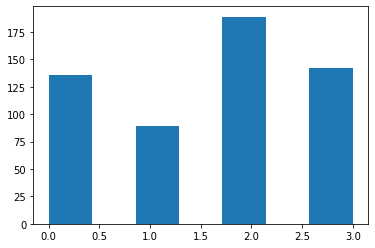

In [39]:
#plt.xticks(np.arange(1, 26))
plt.hist(data.query('USERID==11 & BUILDINGID==0')['FLOOR'],bins=7)

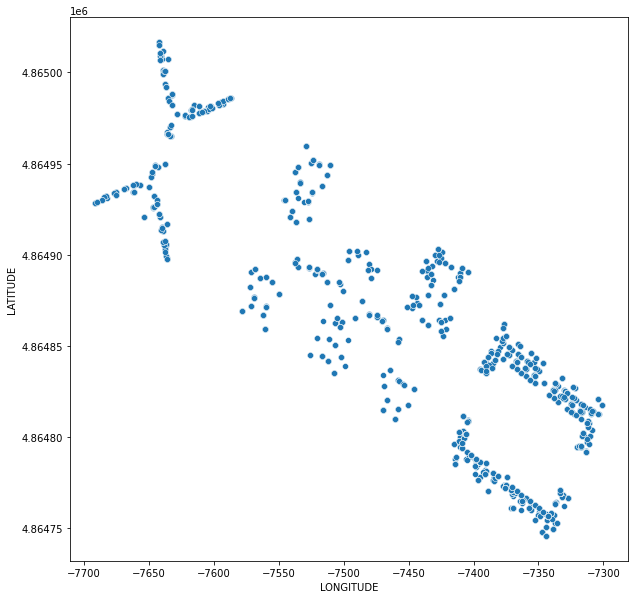

In [40]:
# actual position of outliers - TRAIN
data = trainingData.loc[outliers_train_ind,:]
plt.figure(figsize = (10,10))
plt.xlabel("LONGITUDE")
#sns.scatterplot(data = positions_df_actual_test, x = 'LONGITUDE', y = 'LATITUDE')
#sns.scatterplot(data = positions_df_pred_test, x = 'LONGITUDE', y = 'LATITUDE')
sns.scatterplot(data = data, x = 'LONGITUDE', y = 'LATITUDE')
plt.show()

### Test dataset

In [41]:
lim_test_lat1,lim_test_lat2 = getOutlierLimits(diff_lat_test)

In [42]:
lim_test_long1,lim_test_long2 = getOutlierLimits(diff_long_test)

In [43]:
diff_lat_test_df = pd.DataFrame(diff_lat_test)
index_outliers_lat_test  = diff_lat_test_df.query('(LATITUDE < @lim_test_lat1) or (LATITUDE>@lim_test_lat2)')
diff_long_test_df = pd.DataFrame(diff_long_test)
index_outliers_long_test  = diff_long_test_df.query('(LONGITUDE < @lim_test_long1) or (LONGITUDE>@lim_test_long2)')



Lets try to find out a common pattern for all outliers (by lattitude and by longitude)

In [44]:
# find indexes of ALL outliers
outliers_test_long_ind =  list(index_outliers_long_test.index) 
outliers_test_lat_ind = list(index_outliers_lat_test.index)
outliers_test_ind = list(set(outliers_test_long_ind + outliers_test_lat_ind))

(array([ 56.,   0.,  69.,   0.,   4.,   0.,  15.,   0.,  56.,   0.,  27.,
          0.,  89.,   0.,  52.,   0.,  23.,   0.,  57.,   0., 267.,   0.,
         25.,   0.,  26.,   0.,  30.,   0.,  46.,   0.,  46.,   0.,  51.,
          0.,  36.]),
 array([ 1.        ,  1.48571429,  1.97142857,  2.45714286,  2.94285714,
         3.42857143,  3.91428571,  4.4       ,  4.88571429,  5.37142857,
         5.85714286,  6.34285714,  6.82857143,  7.31428571,  7.8       ,
         8.28571429,  8.77142857,  9.25714286,  9.74285714, 10.22857143,
        10.71428571, 11.2       , 11.68571429, 12.17142857, 12.65714286,
        13.14285714, 13.62857143, 14.11428571, 14.6       , 15.08571429,
        15.57142857, 16.05714286, 16.54285714, 17.02857143, 17.51428571,
        18.        ]),
 <BarContainer object of 35 artists>)

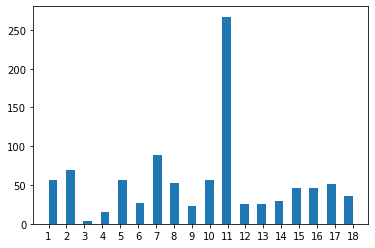

In [45]:
data = trainingData.loc[outliers_test_ind,:]
#plt.xticks(len(data.USERID.sort_values().unique()))
plt.xticks( np.arange(1, 19) )
plt.hist(data=data, x="USERID",bins=35)

(array([204.,   0., 281.,   0., 490.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

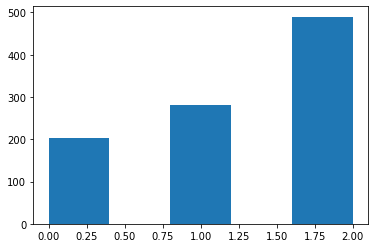

In [46]:
data = trainingData.loc[outliers_test_ind,:]
plt.hist(data=data, x="BUILDINGID",bins=5)

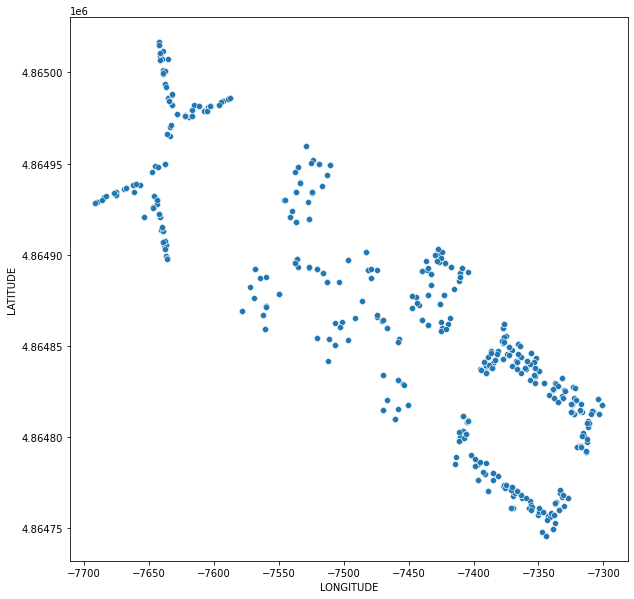

In [47]:
# actual position of outliers - TEST
data = trainingData.loc[outliers_test_ind,:]
plt.figure(figsize = (10,10))
plt.xlabel("LONGITUDE")
#sns.scatterplot(data = positions_df_actual_test, x = 'LONGITUDE', y = 'LATITUDE')
#sns.scatterplot(data = positions_df_pred_test, x = 'LONGITUDE', y = 'LATITUDE')
sns.scatterplot(data = data, x = 'LONGITUDE', y = 'LATITUDE')
plt.show()

### Validation data

In [48]:
lim_val_lat1,lim_val_lat2 = getOutlierLimits(diff_lat_val)

In [49]:
lim_val_long1,lim_val_long2 = getOutlierLimits(diff_long_val)

In [50]:
diff_lat_val_df = pd.DataFrame(diff_lat_val)
index_outliers_lat_val  = diff_lat_val_df.query('(LATITUDE < @lim_val_lat1) or (LATITUDE>@lim_val_lat2)')
diff_long_val_df = pd.DataFrame(diff_long_val)
index_outliers_long_val  = diff_long_val_df.query('(LONGITUDE < @lim_val_long1) or (LONGITUDE>@lim_val_long2)')

In [51]:
# find indexes of ALL outliers
outliers_val_long_ind =  list(index_outliers_long_val.index) 
outliers_val_lat_ind = list(index_outliers_lat_val.index)
outliers_val_ind = list(set(outliers_val_long_ind + outliers_val_lat_ind))

In [52]:
len(outliers_val_ind)

210

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 210.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.]),
 array([-0.5       , -0.47142857, -0.44285714, -0.41428571, -0.38571429,
        -0.35714286, -0.32857143, -0.3       , -0.27142857, -0.24285714,
        -0.21428571, -0.18571429, -0.15714286, -0.12857143, -0.1       ,
        -0.07142857, -0.04285714, -0.01428571,  0.01428571,  0.04285714,
         0.07142857,  0.1       ,  0.12857143,  0.15714286,  0.18571429,
         0.21428571,  0.24285714,  0.27142857,  0.3       ,  0.32857143,
         0.35714286,  0.38571429,  0.41428571,  0.44285714,  0.47142857,
         0.5       ]),
 <BarContainer object of 35 artists>)

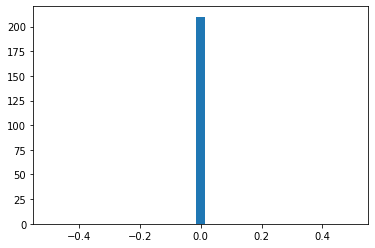

In [53]:
data = validationData.loc[outliers_val_ind,:]
#plt.xticks(len(data.USERID.sort_values().unique()))
#plt.xticks( np.arange(1, 19) )
plt.hist(data=data, x="USERID",bins=35)

(array([62.,  0.,  0., 77.,  0.,  0., 71.]),
 array([0.        , 0.28571429, 0.57142857, 0.85714286, 1.14285714,
        1.42857143, 1.71428571, 2.        ]),
 <BarContainer object of 7 artists>)

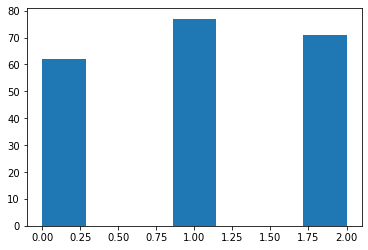

In [54]:
data = validationData.loc[outliers_val_ind,:]
plt.hist(data=data, x="BUILDINGID",bins=7)

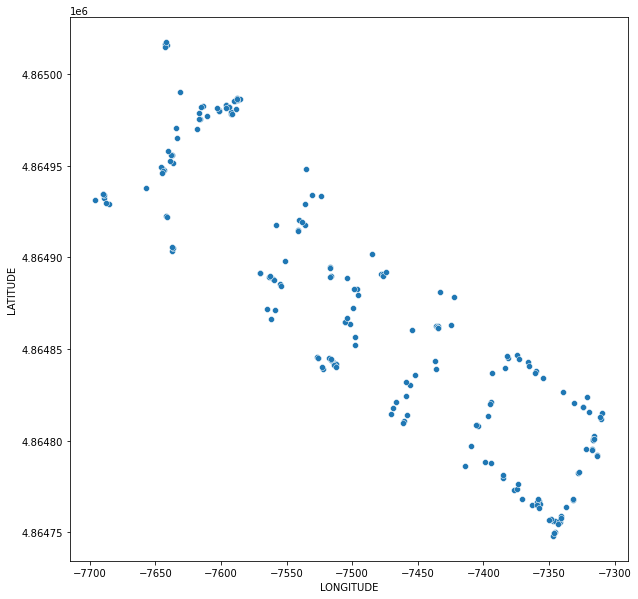

In [55]:
# actual position of outliers - VALIDATION
data = validationData.loc[outliers_val_ind,:]
plt.figure(figsize = (10,10))
plt.xlabel("LONGITUDE")
#sns.scatterplot(data = positions_df_actual_test, x = 'LONGITUDE', y = 'LATITUDE')
#sns.scatterplot(data = positions_df_pred_test, x = 'LONGITUDE', y = 'LATITUDE')
sns.scatterplot(data = data, x = 'LONGITUDE', y = 'LATITUDE')
plt.show()